In [1]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

In [2]:
#grab tickers from csv file
watchlist_df = pd.read_csv('watchlist.csv', header=None)
watchlist = watchlist_df.iloc[0].tolist()

In [3]:
watchlist

['AAPL', 'MSFT', 'GLD', 'XOM', 'NFLX']

In [4]:
'''instantiate TimeSeries class from alpha_vantage library
you must have API keys stored as environment variables for this to work
check out the Alpha Vantage guide on the AlgoTrading 101 blog for more details'''
app = TimeSeries(output_format='pandas')

In [19]:
#itter through watchlist and retrieve daily price data
stocks_df = pd.DataFrame()
for ticker in watchlist:
    alphav_df = app.get_daily_adjusted(ticker)
    alphav_df = alphav_df[0]
    alphav_df.columns = [i.split(' ')[1] for i in alphav_df.columns]

    stocks_df[ticker] = alphav_df['adjusted'].pct_change()

In [20]:
stocks_df = stocks_df[1:11] # Use only the last 10 days for example purposes
stocks_df.head()

,AAPL,MSFT,GLD,XOM,NFLX
date,,,,,
2020-05-15,-0.023019,-0.009464,0.007622,-0.073666,0.003557
2020-05-14,0.005947,-0.014359,-0.005612,0.007143,-0.026949
2020-05-13,-0.006106,-0.004321,-0.008772,-0.008747,-0.008327
2020-05-12,0.012222,0.015355,-0.009531,0.052230,-0.014717
2020-05-11,0.011560,0.023177,-0.003874,0.016670,0.020147


In [28]:
#AAPL correlation with MSFT
stocks_df.AAPL.corr(stocks_df.MSFT)

0.6817118707001117

In [29]:
#AAPL correlation with NFLX
stocks_df.AAPL.corr(stocks_df.NFLX)

-0.1516151287428793

In [30]:
#correlation using kendall method
stocks_df.AAPL.corr(stocks_df.NFLX, method='kendall')

-0.24444444444444444

In [31]:
#correlation using spearman method
stocks_df.AAPL.corr(stocks_df.NFLX, method='spearman')

-0.32121212121212117

In [32]:
#correlation matrix
stocks_df.corr()

,AAPL,MSFT,GLD,XOM,NFLX
AAPL,1.000000,0.681712,-0.533378,0.762428,-0.151615
MSFT,0.681712,1.000000,-0.331221,0.445689,0.452704
GLD,-0.533378,-0.331221,1.000000,-0.348389,-0.054419
XOM,0.762428,0.445689,-0.348389,1.000000,-0.343662
NFLX,-0.151615,0.452704,-0.054419,-0.343662,1.000000


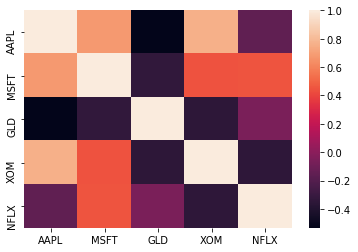

In [33]:
import seaborn as sns
ax = sns.heatmap(stocks_df.corr())

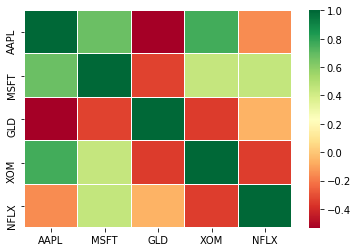

In [34]:
ax = sns.heatmap(stocks_df.corr(), cmap='RdYlGn', linewidths=.1)

In [16]:
#strongest correlated stock with Netflix
nflx_corr_df = stocks_df.corr().NFLX
print(nflx_corr_df[ nflx_corr_df < 1 ].idxmax())

MSFT


In [17]:
#least correlated with Netflix
print(nflx_corr_df.idxmin())

XOM


In [18]:
#create covariance matrix
stocks_df.cov()

,AAPL,MSFT,GLD,XOM,NFLX
AAPL,0.000186,0.000117,-0.000075,0.000393,-0.000018
MSFT,0.000117,0.000165,-0.000045,0.000218,0.000104
GLD,-0.000075,-0.000045,0.000085,-0.000121,-0.000003
XOM,0.000393,0.000218,-0.000121,0.001245,-0.000198
NFLX,-0.000018,0.000104,-0.000003,-0.000198,0.000205
